In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [40]:
plt.rc("font", family="Malgun Gothic")

In [13]:
# 삼성전자 005930
samsung = fdr.DataReader("005930")

# 테슬라 TSLA
# fdr.DataReader("TSLA")

# 비트코인/원
btc_kr = fdr.DataReader("BTC/KRW", "2008")

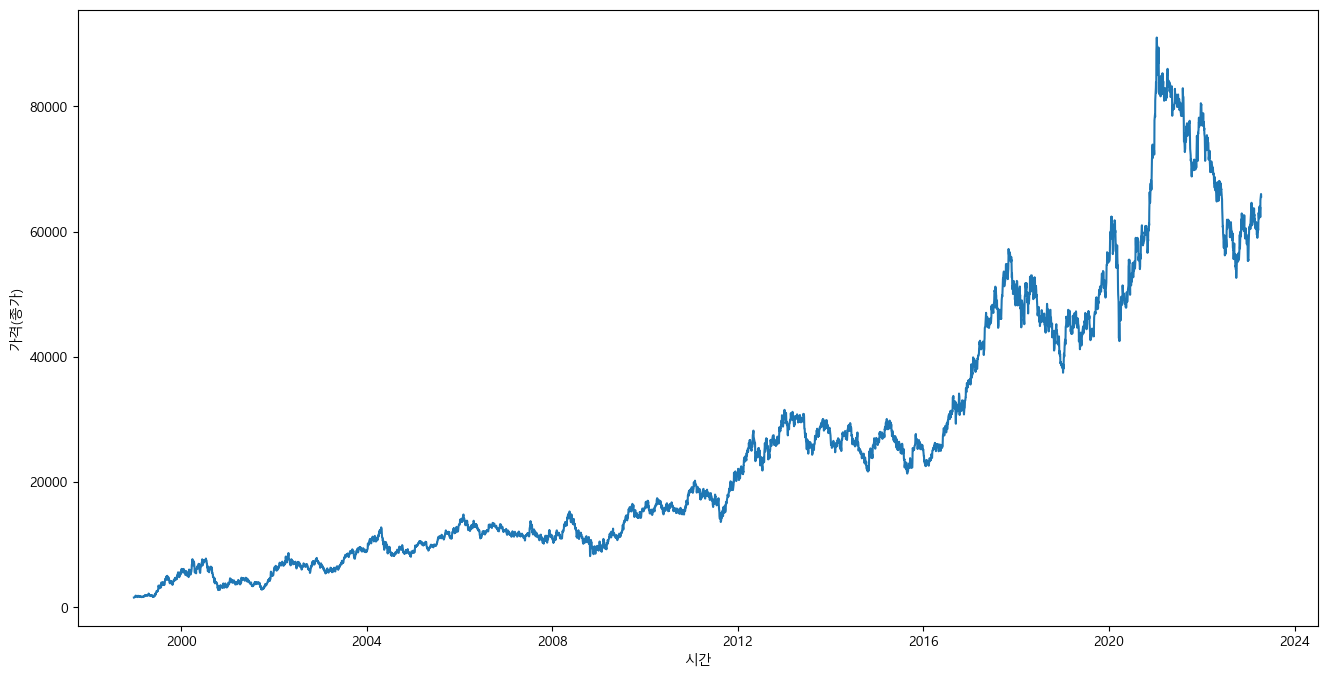

In [12]:
plt.figure(figsize=(16,8))
sns.lineplot(x=samsung.index, y="Close", data=samsung)
plt.xlabel("시간")
plt.ylabel("가격(종가)")
plt.show()

In [15]:
def show_ts(df):
    plt.figure(figsize=(16,8))
    sns.lineplot(x=df.index, y="Close", data=df)
    plt.xlabel("시간")
    plt.ylabel("가격(종가)")
    plt.show()

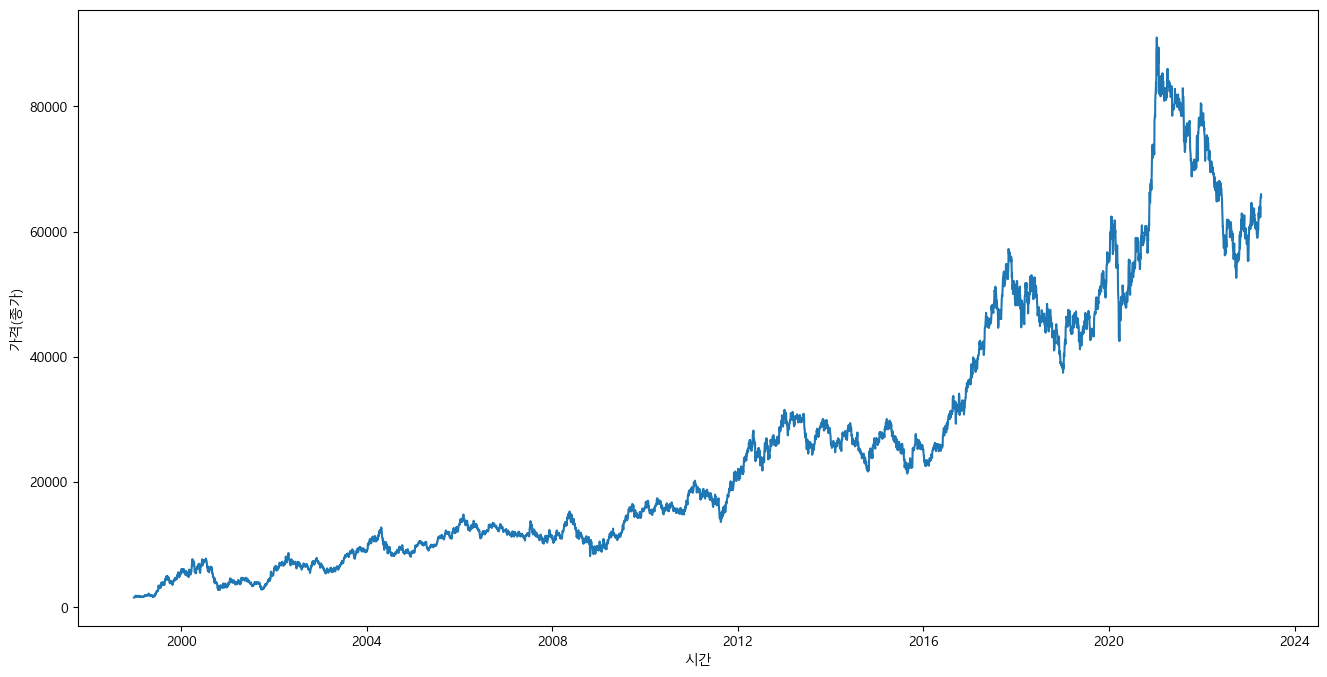

In [18]:
show_ts(samsung)

In [19]:
#경향성이 발견되지 않는다. 어떤 주기가 있을지도 모른다.
time_steps = [["1990", "2000"],
            ["2000", "2010"],
            ["2010", "2015"],
            ["2015", "2020"],
            ["2020", "2022"]]

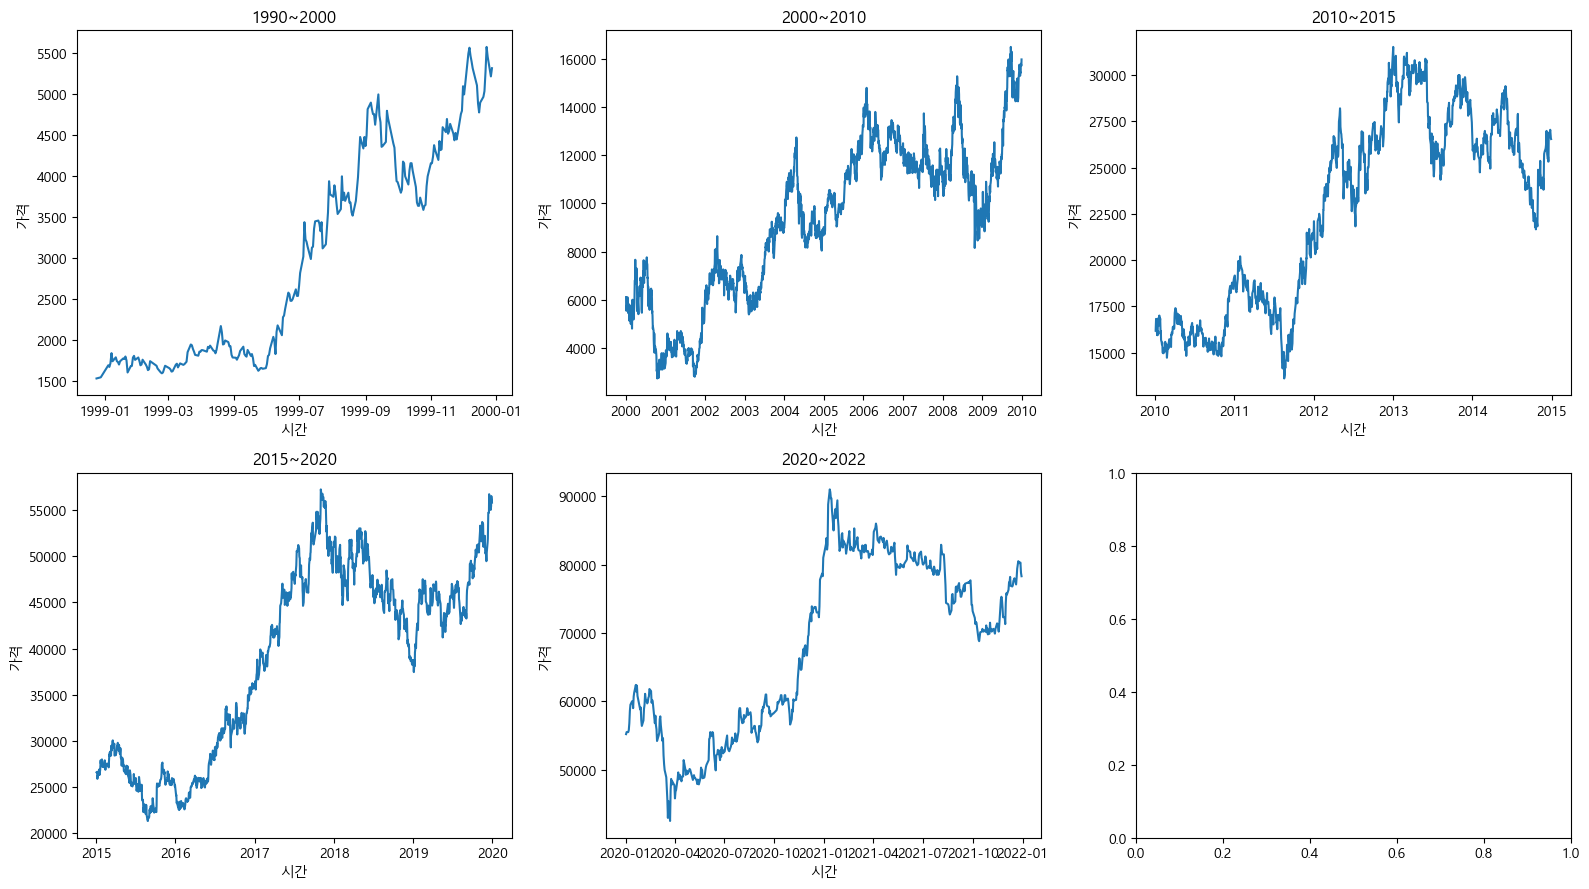

In [24]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(16, 9)

for i in range(5):
    ax = axes[i//3, i%3]
    df = samsung.loc[(samsung.index > time_steps[i][0]) & (samsung.index < time_steps[i][1])] # index가 data로 되어있다.
    sns.lineplot(x=df.index, y=df["Close"], ax=ax) # matplotlib가 subplot을 그릴 때
    ax.set_title(f"{time_steps[i][0]}~{time_steps[i][1]}")
    ax.set_xlabel("시간")
    ax.set_ylabel("가격")
plt.tight_layout()
plt.show()

In [1]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [11]:
# y col, ds col 이 반드시 있어야 한다.
# 데이터 가공
stock = fdr.DataReader("005930", "2022")
stock["y"] = stock["Close"]
stock["ds"] = stock.index
stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831,78600,2022-01-03
2022-01-04,78800,79200,78300,78700,12427416,0.001272,78700,2022-01-04
2022-01-05,78800,79000,76400,77400,25470640,-0.016518,77400,2022-01-05
2022-01-06,76700,77600,76600,76900,12931954,-0.006460,76900,2022-01-06
2022-01-07,78100,78400,77400,78300,15163757,0.018205,78300,2022-01-07


In [13]:
# Raw 데이터를 Fitting!
m = Prophet()
m.fit(stock)

16:22:41 - cmdstanpy - INFO - Chain [1] start processing
16:22:41 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# 예측하고자 하는 기간을 먼저(D) 설정 ~ 길어야 7일이다.
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
342,2023-05-09
343,2023-05-10
344,2023-05-11
345,2023-05-12
346,2023-05-13


In [19]:
# (주기성 파악 주의)
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
342,2023-05-09,64072.079937,61465.719488,66327.425690,63909.174753,64208.067332,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,0.0,0.0,0.0,63901.909904
343,2023-05-10,64100.308690,61512.409623,66213.889269,63924.729171,64246.325508,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,0.0,0.0,0.0,63932.369444
344,2023-05-11,64128.537443,61312.342526,66081.959265,63939.791706,64285.847403,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,0.0,0.0,0.0,63910.699782
345,2023-05-12,64156.766196,61661.210751,66422.931638,63956.559002,64320.556101,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,0.0,0.0,0.0,64137.238837
346,2023-05-13,64184.994949,62177.173159,66950.915306,63974.830890,64360.578388,349.894022,349.894022,349.894022,349.894022,349.894022,349.894022,0.0,0.0,0.0,64534.888971


In [23]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
307,2023-03-31,62951.631210,60397.619513,65265.654533
308,2023-04-03,62931.531191,60595.545245,65542.965969
309,2023-04-04,62913.903549,60703.232383,65401.444068
310,2023-04-05,62944.363088,60674.855835,65532.256628
311,2023-04-06,62922.693426,60683.416702,65274.540731
312,2023-04-07,63149.232481,60637.789745,65531.663361
313,2023-04-10,63129.132462,60910.685060,65610.943949
314,2023-04-11,63111.504820,60837.311387,65387.250589
315,2023-04-12,63141.964359,61000.304682,65577.507013
316,2023-04-13,63120.294698,60604.596712,65507.633689


In [ ]:
# 이왕이면 전체 데이터 확인
m = plt

In [ ]:
fig = plot_plotly(m, forecast)
fig

In [ ]:
# 세부 확인
plot_components_plotly(m, forecast)

In [35]:
# 변경점 확인
from prophet.plot import add_changepoints_to_plot

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca)

In [36]:
covid19 = pd.read_csv("../data/seoul_covid19.csv")
covid19

C:\Users\SW\AppData\Local\Temp\ipykernel_45708\2557537514.py:1: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  covid19 = pd.read_csv("../data/seoul_covid19.csv")


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182553,5,2020-01-31,9.0,NaN,650909-1,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182554,4,2020-01-30,7.0,NaN,561220-1,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182555,3,2020-01-30,6.0,NaN,810212-1,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182556,2,2020-01-30,5.0,NaN,400415-1,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


<Axes: xlabel='확진일'>

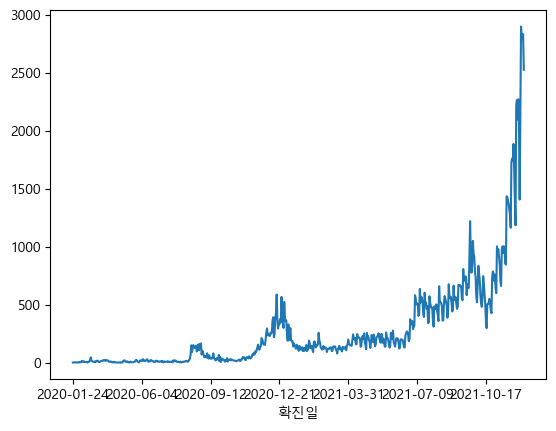

In [42]:
covid19.groupby("확진일")["연번"].count().plot()

<Axes: xlabel='확진일'>

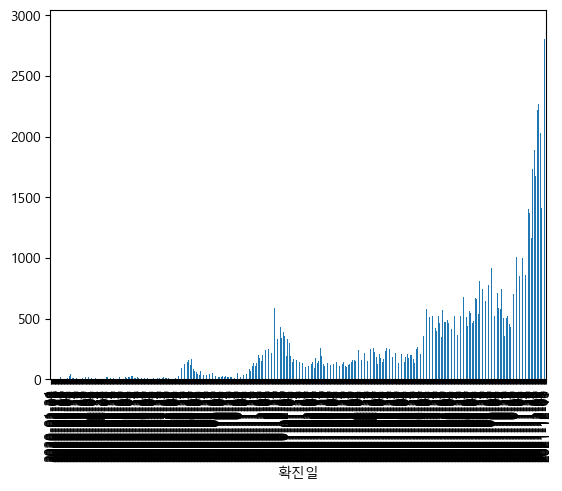

In [43]:
covid19.groupby("확진일")["연번"].count().plot(kind="bar")

In [45]:
covid19.loc[covid19["지역"] == "관악구 "]

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
1428,181130,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1464,181094,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1774,180784,2021-12-11,NaN,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
12155,170403,2021-12-07,NaN,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y


In [47]:
covid19["지역"] = covid19["지역"].apply(lambda x: x.strip())

In [50]:
target = ["동대문", "서대문", "송파", "영등포"]

In [51]:
covid19["지역"].apply(lambda x: x + "구" if x in target else x)

0          기타
1         성북구
2          중구
3          기타
4         광진구
         ... 
182553    성북구
182554    마포구
182555    종로구
182556    중랑구
182557    강서구
Name: 지역, Length: 182558, dtype: object

In [53]:
covid19.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y


In [55]:
covid19_df = covid19.groupby("확진일")["연번"].count().reset_index()
covid19_df

,확진일,연번
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [57]:
covid19_df.columns = ["ds", "y"]
covid19_df

,ds,y
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [58]:
m = Prophet()
m.fit(covid19_df)

17:44:03 - cmdstanpy - INFO - Chain [1] start processing
17:44:03 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
681,2022-01-06
682,2022-01-07
683,2022-01-08
684,2022-01-09
685,2022-01-10


In [61]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
681,2022-01-06,1706.470112,1488.813359,1969.740946,1701.147315,1712.631565,27.225276,27.225276,27.225276,27.225276,27.225276,27.225276,0.0,0.0,0.0,1733.695388
682,2022-01-07,1715.064301,1461.676885,1994.367688,1709.439833,1721.816530,23.240609,23.240609,23.240609,23.240609,23.240609,23.240609,0.0,0.0,0.0,1738.304910
683,2022-01-08,1723.658490,1477.635153,1976.117210,1717.646752,1730.898329,-2.985480,-2.985480,-2.985480,-2.985480,-2.985480,-2.985480,0.0,0.0,0.0,1720.673010
684,2022-01-09,1732.252679,1421.533411,1932.294677,1725.702126,1739.905113,-59.892076,-59.892076,-59.892076,-59.892076,-59.892076,-59.892076,0.0,0.0,0.0,1672.360602
685,2022-01-10,1740.846868,1401.984984,1946.105100,1733.857772,1748.907281,-56.587918,-56.587918,-56.587918,-56.587918,-56.587918,-56.587918,0.0,0.0,0.0,1684.258950


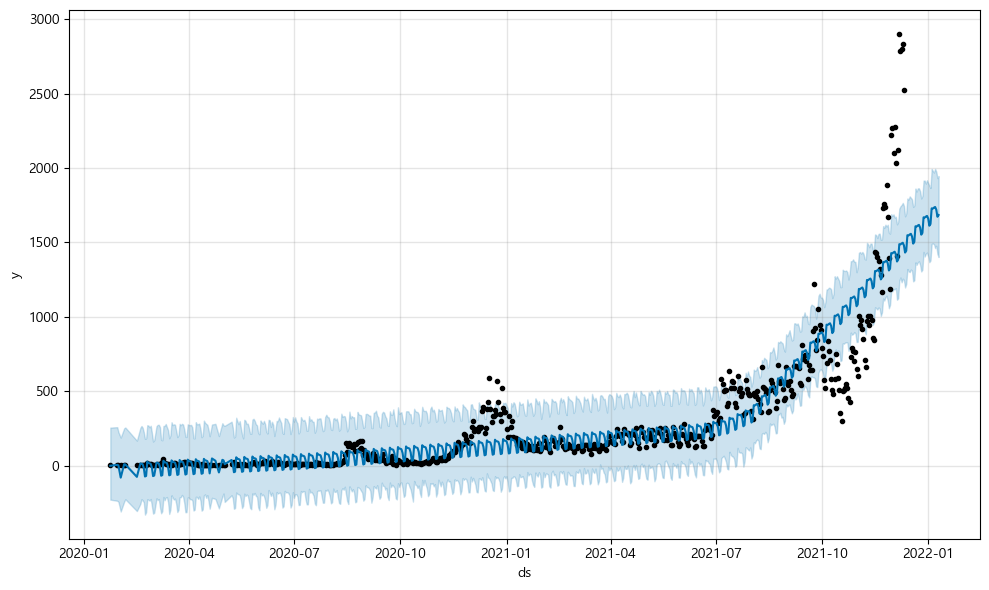

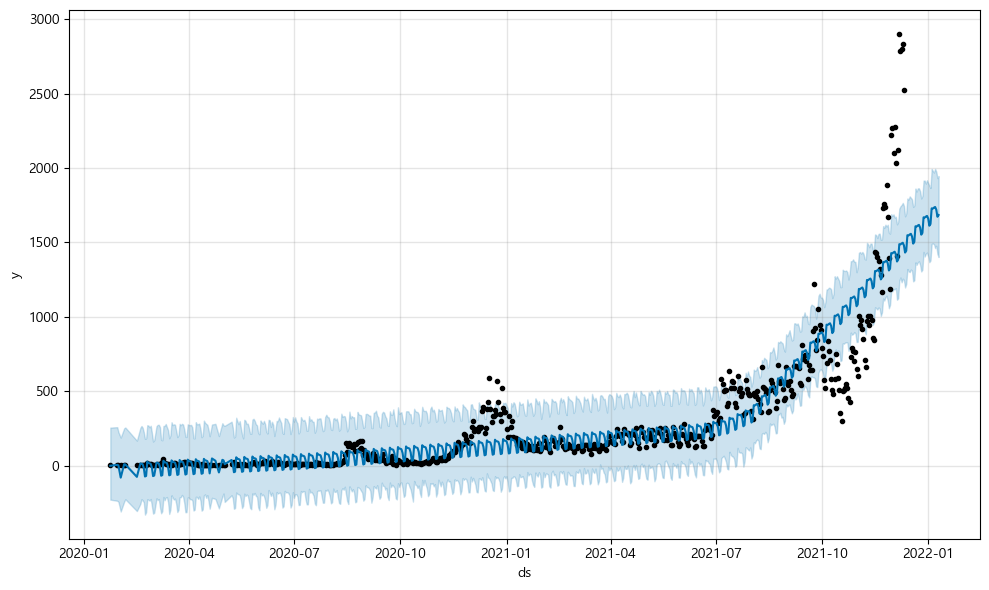

In [63]:
fig = m.plot(forecast)
fig

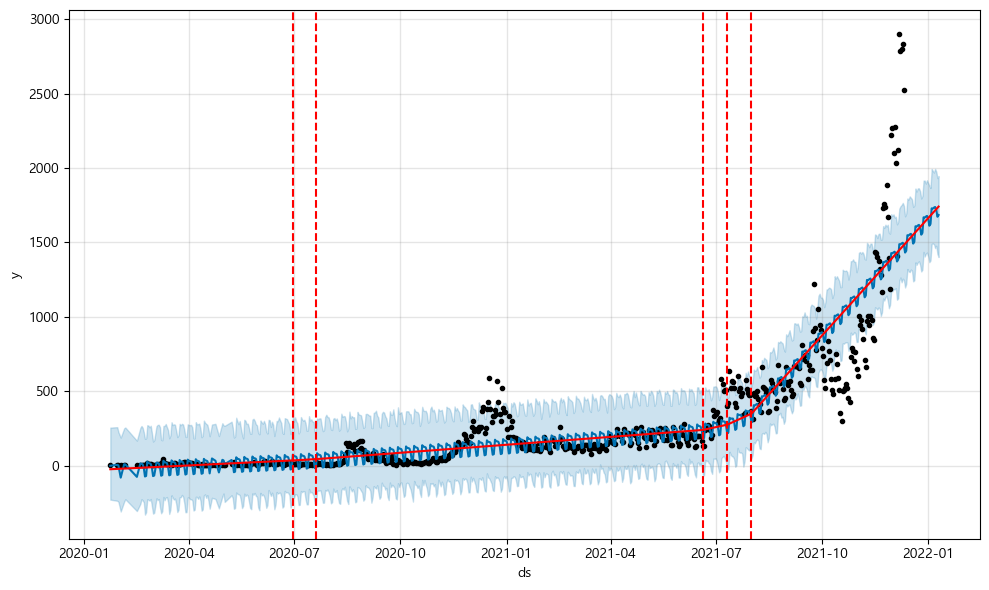

In [64]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)